# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Смена рабочей директории.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/2025-Kovalev-TimeSeriesCourse/practice/04 Matrix profile')

Использование команд, которые автоматически перезагружают все импортированные модули при их изменении.

In [1]:
%load_ext autoreload
%autoreload 2

Для выполнения данной практической работы используйте библиотеку *stumpy*, предназначенную для анализа временных рядов на основе матричного профиля.

Установите библиотеку *stumpy*.

In [2]:
!pip install stumpy


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Home\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

Импорт библиотек и модулей.

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

from modules.plots import *
from modules.mp import *
from modules.motifs import *
from modules.discords import *

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [4]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

In [5]:
plot_ts(ts, "Input time series")

Изучите [документацию](https://stumpy.readthedocs.io/en/latest/index.html) библиотеки *stumpy*. Напишите функцию `calculate_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [6]:
m = 165
exclusion_zone = int(np.ceil(m / 2))
mp = {}

mp = compute_mp(ts, m, exclusion_zone)

Визуализируйте найденный матричный профиль временного ряда.

In [7]:
plot_ts(mp['mp'], "Matrix Profile")

### **Задача 2.**
Найдите top-$k$ мотивов во временном ряде на основе построенного матричного профиля.

In [8]:
top_k = 6
motifs = {}

# Выявление лучших мотивов
motifs_stumpy = stumpy.motifs(ts,mp['mp'], max_matches = top_k)
motifs_top_k = motifs_stumpy[1][0]

In [9]:
# Матрица для индексов
motifs_indices = np.zeros([top_k,3])

In [10]:
for key, value in enumerate(motifs_top_k):
  # Выбор минимального профиля матрицы по индексу профиля матрицы
  min_mp = np.min(np.where(
      mp['mpi']==value,
      mp['mp'],
      np.inf))

  # Выбор индекса левого мотива по минимальному профилю матрицы
  motif_left_idx = np.where(
      (mp['mp']==min_mp) & (mp['mpi']==value),
      mp['indices']['left'],
      None
  )

  # Выбор индекса правого мотива по min профилю матрицы
  mofit_right_idx = np.where(
      (mp['mp']==min_mp) & (mp['mpi']==value),
      mp['indices']['right'],
      None
  )
  motifs_indices[key][0]=motif_left_idx[motif_left_idx != np.array(None)][0]
  motifs_indices[key][1]=mofit_right_idx[mofit_right_idx != np.array(None)][0]

In [11]:
motifs = {
    'indices':motifs_indices.astype(int),
    'mp': motifs_stumpy[0][0],
    'mpi': motifs_stumpy[1][0]
    }

Выполните визуализацию найденных top-$k$ мотивов.

In [12]:
plot_motifs(mp, motifs)

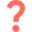
Проанализируйте и изложите содержательный смысл полученных результатов.



```
С помощью вычисленного матричного профиля можно найти топ-к мотивов ряда
```



### **Задача 3.**
Найдите top-$k$ диссонансов во временном ряде на основе матричного профиля.

Для решения данной задачи загрузите временной ряд, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

In [13]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()

In [14]:
plot_ts(ts, "Input time series")

Найдите матричный профиль и на его основе top-$k$ диссонансы.

In [15]:
m = 96
exclusion_zone = int(np.ceil(m / 2))
mp = {}

mp = compute_mp(ts.astype(np.float64), m, exclusion_zone)

In [16]:
top_k = 15

top_k_idxs = []
discords = {}

mp_sort= np.argsort(mp['mp'])

for i in range(1, len(mp_sort)+1):
    idx = mp_sort[-i]
    flag = True
    for top_k_idx in top_k_idxs:
        if abs(top_k_idx - idx) < exclusion_zone:
            flag = False
    if flag:
        top_k_idxs.append(idx)
    if len(top_k_idxs) == top_k:
        break

print(top_k_idxs)

discords['indices'] = top_k_idxs

[np.int64(9985), np.int64(10048), np.int64(8784), np.int64(10097), np.int64(8837), np.int64(5868), np.int64(105), np.int64(9651), np.int64(8449), np.int64(5954), np.int64(7107), np.int64(154), np.int64(8396), np.int64(8640), np.int64(2930)]


Выполните визуализацию найденных top-$k$ диссонансов.

In [17]:
plot_discords(mp, discords)

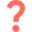
Проанализируйте и изложите содержательный смысл полученных результатов.

С помощью вычисленного матричного профиля можно найти топ-к диссонансов ряда. Дисонансам исходной временной серии соответствуют экстремумы матричного профиля